<a href="https://colab.research.google.com/github/icarusrodrigues/queue-simulations/blob/main/MM1K_Queue_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M/M/1/k Queue**

An M/M/C queue is a queuing model used in Queuing Theory to analyze the behavior of queuing systems with a single server and customer arrival following a Poisson process (M), exponential service times (M) and a maximum size (k).

In [8]:
!pip install simpy

In [9]:
import numpy as np
import simpy as sp
import matplotlib.pyplot as plt

In [10]:
class MM1KQueue:

  def __init__(self, arrival_rate, service_rate, capacity, horizon, show=False):
    self.env = sp.Environment()
    self.n = 0
    self.arrival_rate = arrival_rate
    self.service_rate = service_rate
    self.capacity = capacity
    self.horizon = horizon
    self.show = show
    self.n_rejections = 0
    self.times_queue = []
    self.people_queue = []
    self.rejections_queue = []

  def arrive(self):
    while True:
      yield self.env.timeout(np.random.exponential(1/self.arrival_rate))

      if self.n == self.capacity:
        self.n_rejections += 1

        self.times_queue.append(self.env.now)
        self.people_queue.append(self.n)
        self.rejections_queue.append(self.n_rejections)

        if self.show:
          print(f"Someone got rejected!\n- n = {self.n}, rejections = {self.n_rejections}, t = {self.env.now})\n")

      else:
        self.n += 1

        self.times_queue.append(self.env.now)
        self.people_queue.append(self.n)
        self.rejections_queue.append(self.n_rejections)

        if self.show:
          print(f"Someone arrived!\n- n = {self.n}, rejections = {self.n_rejections}, t = {self.env.now})\n")

        if self.n == 1:
          self.env.process(self.service())

  def service(self):
    while self.n > 0:

      yield self.env.timeout(np.random.exponential(1/self.service_rate))
      self.n -= 1

      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)
      self.rejections_queue.append(self.n_rejections)

      if self.show:
        print(f"Someone was attended to!\n- n = {self.n}, t = {self.env.now})\n")

  def run_simulation(self):
    self.env.process(self.arrive())

    if self.n > 0:
      self.env.process(self.service())

    self.env.run(until=self.horizon)

    print("Final da simulação!")

Example of simulation using an arrival rate of 7 people per minute, a service rate of 5 people per minute, over a period (horizon) of 30 minutes in a system with a capacity of 10 people. You can see the size of the queue when someone arrives or leaves.

In [11]:
arrival_rate = 7
service_rate = 5
capacity = 10
horizon = 30

mm1k_queue = MM1KQueue(arrival_rate, service_rate, capacity, horizon, True)

mm1k_queue.run_simulation()

Someone arrived!
- n = 1, rejections = 0, t = 0.14816088409785336)

Someone was attended to!
- n = 0, t = 0.3150545161700436)

Someone arrived!
- n = 1, rejections = 0, t = 1.040686251434852)

Someone arrived!
- n = 2, rejections = 0, t = 1.0662567138036354)

Someone was attended to!
- n = 1, t = 1.1293382133243695)

Someone arrived!
- n = 2, rejections = 0, t = 1.238161014938434)

Someone was attended to!
- n = 1, t = 1.3848336543611348)

Someone was attended to!
- n = 0, t = 1.3874495567383556)

Someone arrived!
- n = 1, rejections = 0, t = 1.538183123862055)

Someone was attended to!
- n = 0, t = 1.6431817413962782)

Someone arrived!
- n = 1, rejections = 0, t = 1.828199276553394)

Someone was attended to!
- n = 0, t = 2.001950714795667)

Someone arrived!
- n = 1, rejections = 0, t = 2.070756548669283)

Someone was attended to!
- n = 0, t = 2.1086463367206396)

Someone arrived!
- n = 1, rejections = 0, t = 2.1896103938934073)

Someone was attended to!
- n = 0, t = 2.2709567904463643

Below there is a graph showing how the queue behaves over time.

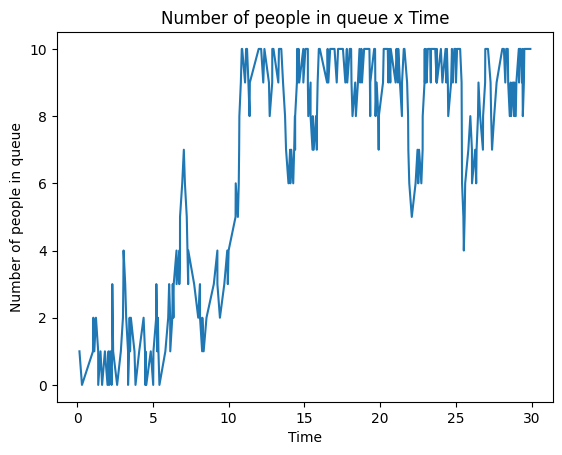

In [12]:
plt.plot(mm1k_queue.times_queue, mm1k_queue.people_queue)
plt.title("Number of people in queue x Time")
plt.xlabel("Time")
plt.ylabel("Number of people in queue")
plt.show()

And below there is a graph showing the growth in the number of rejections

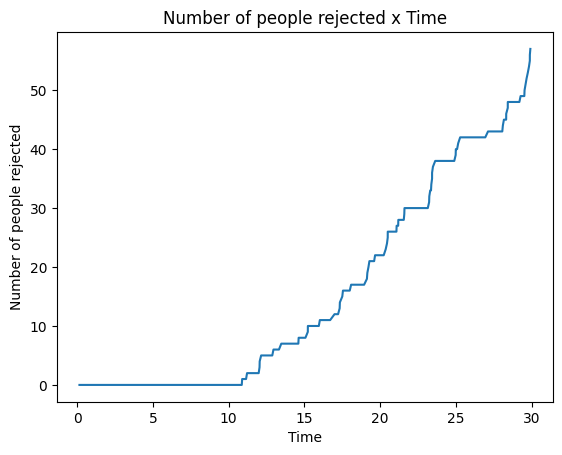

In [13]:
plt.plot(mm1k_queue.times_queue, mm1k_queue.rejections_queue)
plt.title("Number of people rejected x Time")
plt.xlabel("Time")
plt.ylabel("Number of people rejected")
plt.show()